In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# Read the csvs
df = pd.read_csv("dataset/train.csv")
testdf = pd.read_csv("dataset/test.csv")
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [120]:
# get details about the datasets
def print_shapes():
    print("Training data shape : {}".format(df.shape))
    print("Testing data shape : {}".format(testdf.shape))

print_shapes()

Training data shape : (1460, 81)
Testing data shape : (1459, 80)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [122]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [123]:
# get all the cols
cols = df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [124]:
# get all the cols where entries are not full
# output format ex: {Missing col : missing entries}

incomplete_cols={col_entry:df['Id'].count()-df[col_entry].count() for col_entry in cols if df[col_entry].count()!= df['Id'].count()}
incomplete_cols= sorted(incomplete_cols.items(), key= lambda x:x[1], reverse= True)
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

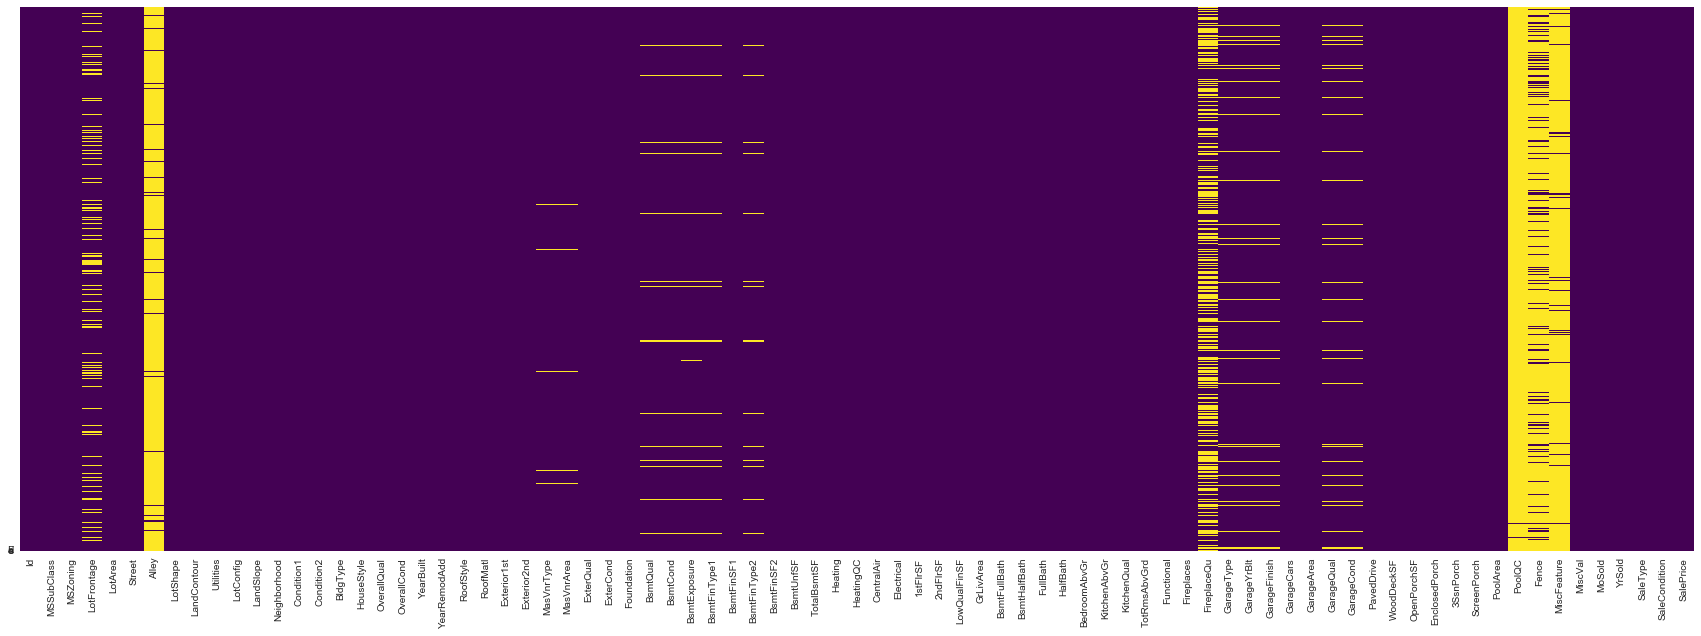

In [125]:
# plot a heatmap to indicate null values
# yellow indicates null values in that column
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels = "False",cbar=False,cmap='viridis')

# Handling the Training Dataset

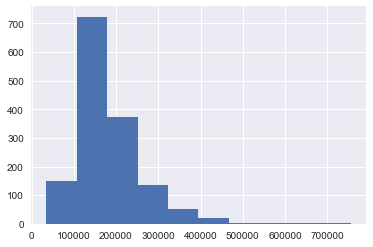

In [126]:
# sale price for houses
df['SalePrice'].hist()

In [127]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [128]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [129]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [130]:
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

In [131]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

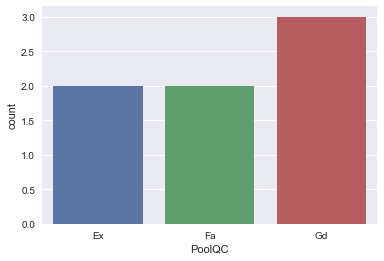

In [132]:
sns.countplot(data=df,x='PoolQC')

In [133]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

concatDFs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],keys=['Train','Test'],axis=1)
naDfs = pd.DataFrame(concatDFs)
naDfs[naDfs.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [134]:
# drop those values where many values are missing for both test and train
# threshold: 600, i.e if the values are more than 600, then drop those cols.

df.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1 ,inplace=True)
testdf.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1,inplace=True)

In [135]:
# check the df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [136]:
# check the test df
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [137]:
# find the correlation between price and each other col 
correlationSP = df.corr()['SalePrice'].sort_values(ascending = False)
correlationSP

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [138]:
# get features to be delete features where correlation is under 0.3
delete_features = correlationSP[correlationSP<0.3]
delete_features = (list(delete_features.index)) 
delete_features

['HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [139]:
# drop both, train and test
df.drop(delete_features,axis=1, inplace=True)
testdf.drop(delete_features,axis=1,inplace=True)

In [140]:
# check for the dropped dataframes in both
print_shapes()

Training data shape : (1460, 57)
Testing data shape : (1459, 56)


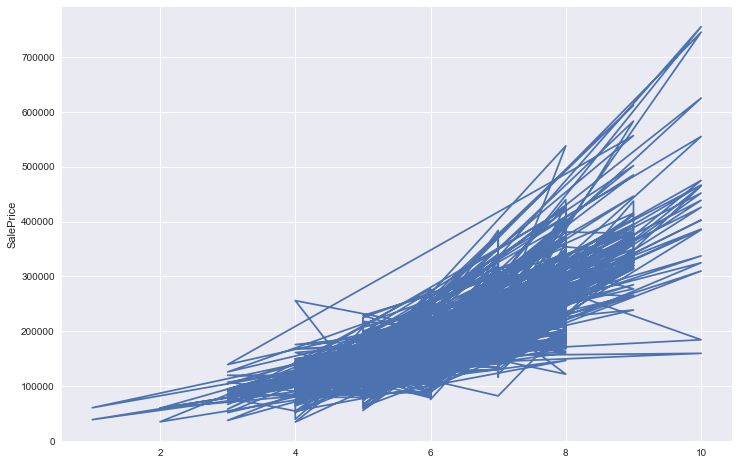

In [141]:
# fig of overallQual vs saleprice
fig,axes = plt.subplots(figsize = (12,8))
axes.plot(df['OverallQual'], df['SalePrice'])
axes.set_ylabel("OverallQual")
axes.set_ylabel("SalePrice")

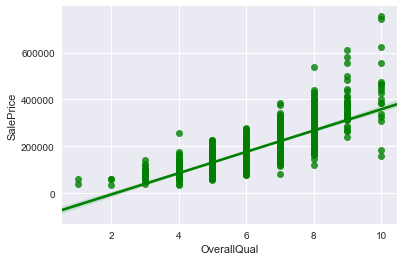

In [142]:
# Plot a regression line for overallQual vs salesprice
sns.regplot(data=df, x='OverallQual',y='SalePrice',color='green')

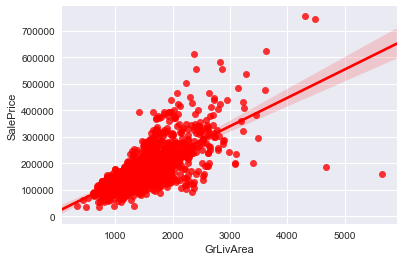

In [143]:
sns.regplot(data=df, x='GrLivArea',y='SalePrice',color='red')

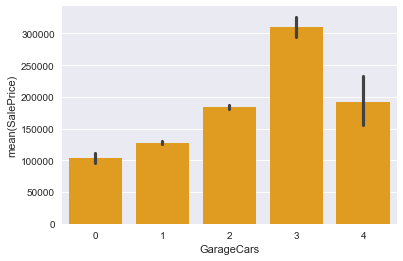

In [144]:
sns.barplot(data=df, x='GarageCars',y='SalePrice',color='orange')

In [145]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtQual,37,44.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0


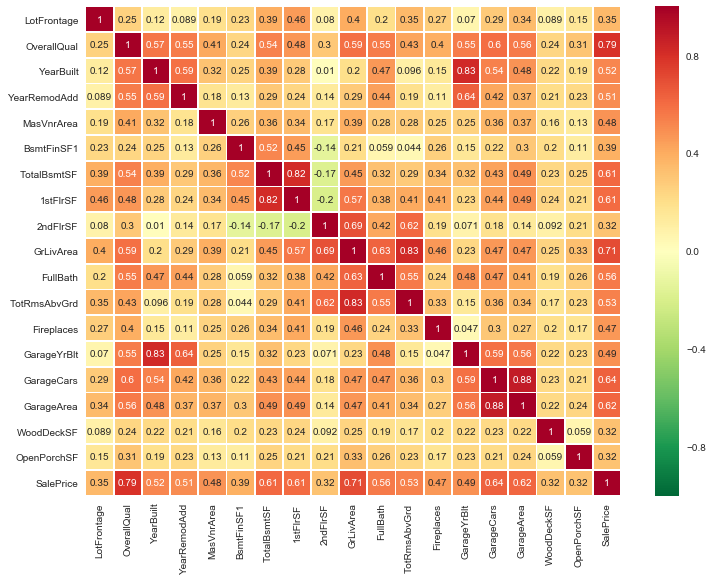

In [146]:
# look at the most missing values 
# one of which : LotFrontage	259	227.0
# now look at the most correlated values to LotFrontage
# to make it happen

# Load the datset of correlations between
corrmat = df.corr()
corrmat

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, cmap='RdYlGn_r', linewidths=0.8, annot=True)

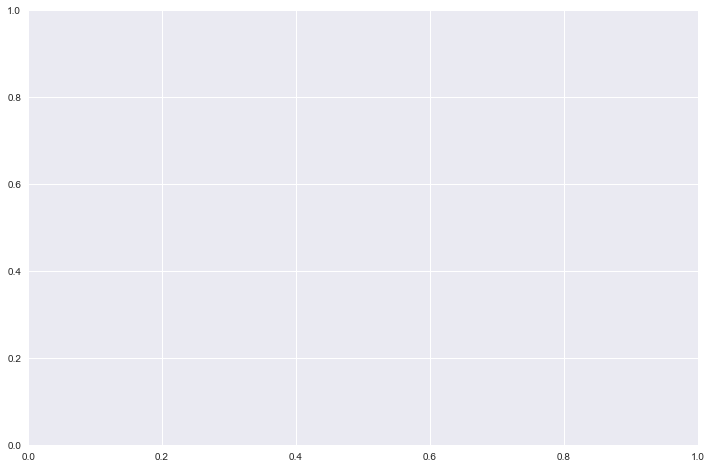

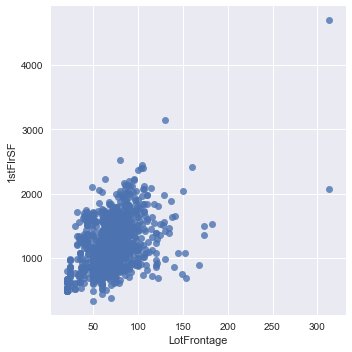

In [147]:
# 'LotFrontage' seems to have high correlation with '1stFlrSF'
# Consider boxplotting them to fill voids

fig,axes = plt.subplots(figsize=(12,8))
sns.lmplot(x='LotFrontage',y='1stFlrSF',data=df,fit_reg=False)

In [163]:
# fill empty values by building a regression model to predict the missing values
# features - pick 3 highest correlating values to LotFrontage to build a predictive model
# I prefer to choose - 'totalBsmtSf', '1stFloor', 'GRLivingArea'
to_clean_df= df[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']]
 
# only accept non empty cells
cleaned_df = to_clean_df[to_clean_df['LotFrontage'].notnull()]
cleaned_df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
0,856,856,1710,65.0
1,1262,1262,1262,80.0
2,920,920,1786,68.0
3,756,961,1717,60.0
4,1145,1145,2198,84.0


In [164]:
# prepare basic variables to apply a ML model.
X = cleaned_df[['TotalBsmtSF','1stFlrSF','GrLivArea']]
y = cleaned_df[['LotFrontage']]

In [165]:
X.shape

(1201, 3)

In [246]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.ensemble import RandomForestRegressor
inner_model = RandomForestRegressor(n_estimators=60)
inner_model.fit(X_train,y_train)


C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [247]:
predictions = inner_model.predict(X_test)
predictions 

array([  71.85      ,   51.95888889,   84.        ,   86.15      ,
        100.68333333,   76.75      ,   93.47769841,   63.60277778,
         86.05      ,   68.86058764,   67.26666667,   42.53555556,
         71.03333333,   73.68333333,   56.40833333,   56.05416667,
         75.12083333,   48.15      ,   79.38333333,   98.2875    ,
         68.78666667,   82.58333333,   98.8       ,   46.91388889,
         80.96666667,   71.60138889,   94.53333333,   90.08333333,
         70.48333333,   70.12      ,   91.95      ,   70.98333333,
         64.49190476,   62.93333333,   73.83333333,   73.9       ,
         68.76666667,   77.88333333,   48.        ,   87.9       ,
         62.58333333,   91.2375    ,   72.96887566,   82.53333333,
         98.33666667,  111.46666667,   77.70555556,   76.66666667,
         76.26666667,   69.075     ,   66.57162698,   65.25      ,
         95.11666667,   59.2725    ,   90.88333333,   60.2       ,
         91.1       ,   83.13333333,   68.86058764,   98.31666

In [248]:
y_test

,LotFrontage
292,60.0
1238,63.0
280,82.0
82,78.0
440,105.0
355,105.0
53,68.0
1067,80.0
1027,71.0
722,70.0


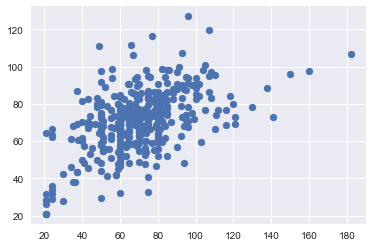

In [249]:
# roughly check the accuracy of prediction by scatter plotting
plt.scatter(y_test,predictions)

In [250]:
# check the accuracy in real
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.3695532997
MSE: 370.644229069
RMSE: 19.2521227159


In [ ]:
# inner regression model seems to be fairly(supposedly 85%) accurate
